# My CNN 

## Dataset loading

In [1]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


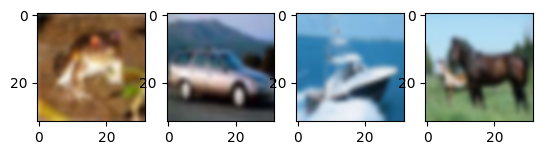

In [4]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Normalize (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


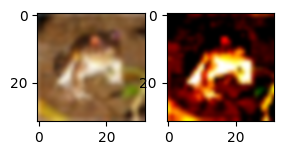

In [5]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [66]:
def mycnn(input_shape=(32, 32, 3), classes=10):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input

    X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(X)
    X = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(X)
    tmp = X
    X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(X)
    X = tf.keras.layers.add([X, X_input])
    X = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(X)

    #X = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(X)
    #X = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(X)
    #
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(1024, activation='relu')(X)
    X = tf.keras.layers.Dense(10, activation='softmax')(X)  # ouput layer (10 class)

    model = tf.keras.models.Model(inputs=X_input, outputs=X, name="ResNet50CL")

    return model


model = mycnn()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)


ValueError: Inputs have incompatible shapes. Received shapes (16, 16, 16) and (32, 32, 3)

Epoch 1/15


2022-12-29 16:11:14.952304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 1.5514 - accuracy: 0.4561

2022-12-29 16:11:19.984990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 6s 28ms/step - loss: 1.5514 - accuracy: 0.4561 - val_loss: 1.2863 - val_accuracy: 0.5437
Epoch 2/15
196/196 [==============================] - 4s 22ms/step - loss: 1.1730 - accuracy: 0.5879 - val_loss: 1.1276 - val_accuracy: 0.6029
Epoch 3/15
196/196 [==============================] - 5s 25ms/step - loss: 1.0310 - accuracy: 0.6393 - val_loss: 1.0248 - val_accuracy: 0.6407
Epoch 4/15
196/196 [==============================] - 4s 21ms/step - loss: 0.9364 - accuracy: 0.6737 - val_loss: 1.0093 - val_accuracy: 0.6437
Epoch 5/15
196/196 [==============================] - 4s 20ms/step - loss: 0.8513 - accuracy: 0.7044 - val_loss: 0.9478 - val_accuracy: 0.6721
Epoch 6/15
196/196 [==============================] - 4s 19ms/step - loss: 0.7738 - accuracy: 0.7325 - val_loss: 0.8967 - val_accuracy: 0.6917
Epoch 7/15
196/196 [==============================] - 4s 19ms/step - loss: 0.7100 - accuracy: 0.7537 - val_loss: 0.9124 - val_accuracy: 0.6875
Epoch 8/15

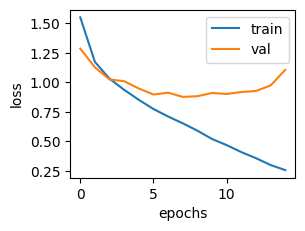

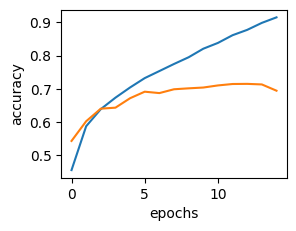

In [65]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=15, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()